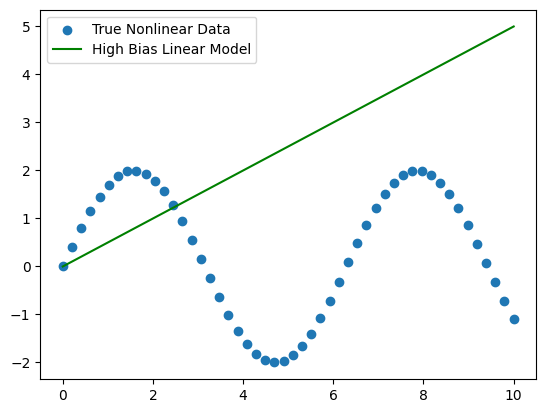

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

# Generating high bias data
x = np.linspace(0, 10, 50)
y = 2 * np.sin(x)

plt.scatter(x, y, label="True Nonlinear Data")
plt.plot(x, 0.5 * x, color='g', label="High Bias Linear Model")
plt.legend()
plt.show()


In [9]:
from sklearn.linear_model import LinearRegression
import pandas as pd

In [20]:
# Fit
lm = LinearRegression().fit(x.reshape(-1, 1), y)
# Predict
preds = lm.predict(x.reshape(-1, 1))

# Performance
(pd
 .DataFrame({'Actual': y,
             'Predicted': preds,
             'Difference %': (y-preds)/y})
 .head(10)
 .T
 )

<ipython-input-20-6790ba66a1da>:10: RuntimeWarning: divide by zero encountered in divide
  'Difference %': (y-preds)/y})


,0,1,2,3,4,5,6,7,8,9
Actual,0.000000,0.405336,0.793848,1.149412,1.457270,1.704643,1.881266,1.979806,1.996175,1.929693
Predicted,0.531968,0.524472,0.516977,0.509481,0.501986,0.494490,0.486994,0.479499,0.472003,0.464508
Difference %,-inf,-0.293921,0.348771,0.556746,0.655530,0.709916,0.741135,0.757805,0.763546,0.759284


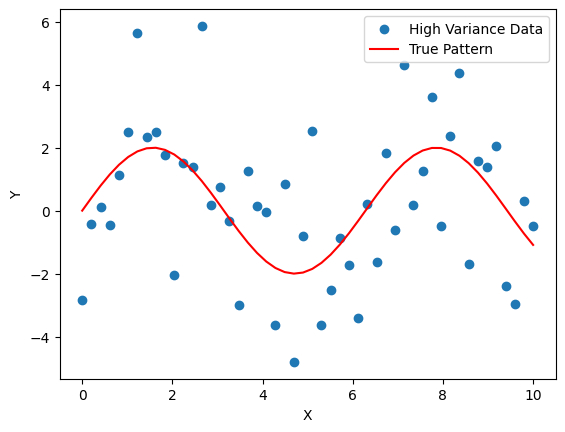

In [23]:
# Generating high variance data
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 50)
y = 2 * np.sin(x) + np.random.normal(0, 2, len(x))  # Adding noise

plt.scatter(x, y, label="High Variance Data")
plt.plot(x, 2 * np.sin(x), color='r', label="True Pattern")
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


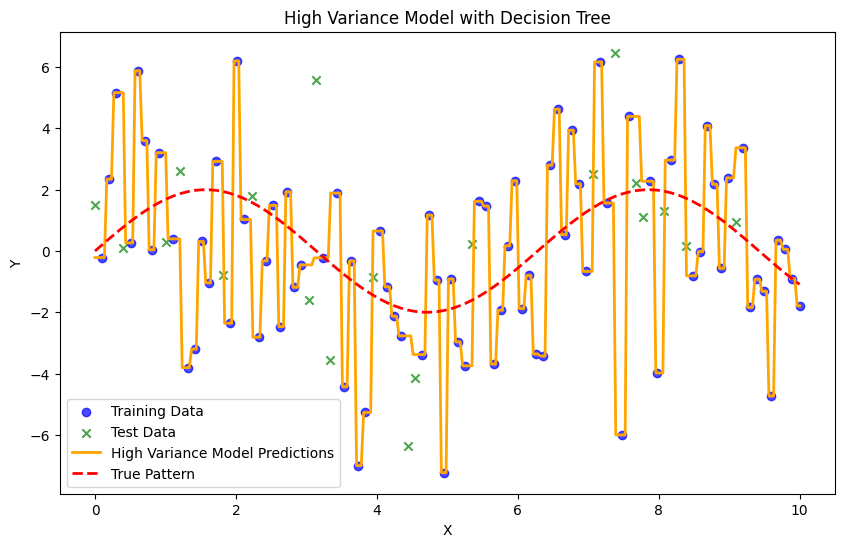

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Generate high variance data
np.random.seed(42)
x = np.linspace(0, 10, 100).reshape(-1, 1)
y_true = 2 * np.sin(x).ravel()
y_high_variance = y_true + np.random.normal(0, 3, len(x))  # Adding noise

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y_high_variance,
                                                    test_size=0.2,
                                                    random_state=42)

# Fit a decision tree regressor (high variance model due to overfitting)
tree_high_variance = DecisionTreeRegressor(max_depth=None, random_state=42)  # No depth limit increases variance
tree_high_variance.fit(x_train, y_train)

# Predict using the model
x_range = np.linspace(0, 10, 300).reshape(-1, 1)  # Fine range for smooth predictions
y_pred = tree_high_variance.predict(x_range)

# Plot the data and model predictions
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='blue', label='Training Data', alpha=0.7)
plt.scatter(x_test, y_test, color='green', label='Test Data', alpha=0.7, marker='x')
plt.plot(x_range, y_pred, color='orange', label='High Variance Model Predictions', linewidth=2)
plt.plot(x, y_true, color='red', label='True Pattern', linewidth=2, linestyle='--')
plt.title("High Variance Model with Decision Tree")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


In [31]:
# Predictions test set
preds = tree_high_variance.predict(x_test)

(pd
 .DataFrame({'Actual': y_test,
             'Predicted': preds,
             'Difference %': 100*(y_test-preds)/y_test})
 .head(10)
 .T
)

,0,1,2,3,4,5,6,7,8,9
Actual,0.170948,0.232208,2.501400,-4.131730,-6.364200,-0.841061,1.793025,1.289754,0.303518,1.490142
Predicted,-0.810448,-3.746043,-0.667673,-3.377572,-2.768721,0.650225,-2.814192,-3.978516,3.205571,-0.213116
Difference %,574.089407,1713.230086,126.691983,18.252845,56.495385,177.310030,256.952219,408.470813,-956.138529,114.301724


In [32]:
# Predictions Train set
train_preds = tree_high_variance.predict(x_train)

(pd
 .DataFrame({'Actual': y_train,
             'Predicted': train_preds,
             'Difference %': 100*(y_train-train_preds)/y_train})
 .head(10)
 .T
)

,0,1,2,3,4,5,6,7,8,9
Actual,1.463637,-0.568069,-2.467337,-2.130113,-0.667673,0.310042,0.650225,0.350675,3.205571,1.564071
Predicted,1.463637,-0.568069,-2.467337,-2.130113,-0.667673,0.310042,0.650225,0.350675,3.205571,1.564071
Difference %,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [37]:
print('Train Set:',tree_high_variance.score(x_train, y_train))
print('Test Set:',tree_high_variance.score(x_test, y_test))

Train Set: 1.0
Test Set: -0.26132086672384913
